In [ ]:

import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from wordcloud import WordCloud

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import coo_matrix

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df = pd.read_csv("data_row.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


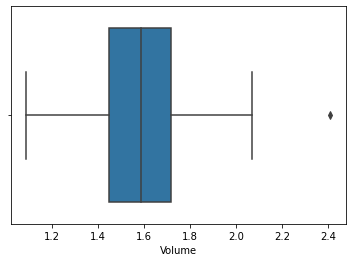

27.0
2.2


Text(0, 0.5, 'fuel_price(TEUR)')

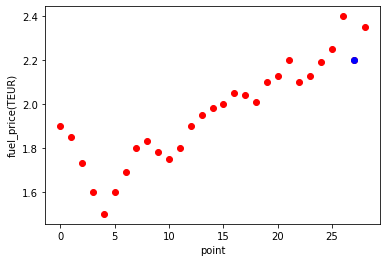

In [ ]:
# load data 

# detect and deal with outlier

outlier_dataset = np.array(df["fuel_price(TEUR)"])  # type=numpy.ndarray len=38
outlier_date = np.array(df["Date"])
outlier_date_time = [datestr2num(i) for i in outlier_date]
outlier_date_time = np.array(outlier_date_time)
ourlier_x = np.linspace(0,28,num=29) 

# box plot - find out outliers for volume data
sns.boxplot(outlier_dataset)
plt.xlabel(r'Volume')
plt.show()

y = list(df["gas"])     #0~10等差插入11个数，需要预测的值
y[27] = 2.2
x = np.linspace(0,28,num=29) 
# print(x[27])
# print(y[27])
plt.plot(x,y,'ro')
plt.plot(x1, y1, "bo")
plt.xlabel("point")
plt.ylabel("fuel_price(TEUR)")

[1.9        1.88939394 1.87878788 1.86818182 1.85757576 1.84272727
 1.81727273 1.79181818 1.76636364 1.74090909 1.71424242 1.68666667
 1.65909091 1.63151515 1.60393939 1.58181818 1.56060606 1.53939394
 1.51818182 1.5030303  1.52424242 1.54545455 1.56666667 1.58787879
 1.60818182 1.62727273 1.64636364 1.66545455 1.68454545 1.70666667
 1.73       1.75333333 1.77666667 1.8        1.80636364 1.81272727
 1.81909091 1.82545455 1.8269697  1.81636364 1.80575758 1.79515152
 1.78454545 1.77636364 1.77       1.76363636 1.75727273 1.75090909
 1.75909091 1.76969697 1.78030303 1.79090909 1.8030303  1.82424242
 1.84545455 1.86666667 1.88787879 1.90454545 1.91515152 1.92575758
 1.93636364 1.9469697  1.95454545 1.96090909 1.96727273 1.97363636
 1.98       1.98424242 1.98848485 1.99272727 1.9969697  2.0030303
 2.01363636 2.02424242 2.03484848 2.04545455 2.04878788 2.04666667
 2.04454545 2.04242424 2.04030303 2.03454545 2.02818182 2.02181818
 2.01545455 2.01272727 2.03181818 2.05090909 2.07       2.08909

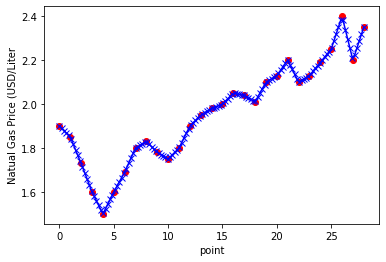

In [ ]:
f1 = scipy.interpolate.interp1d(x,y,kind='linear')
f2 = scipy.interpolate.interp1d(x,y,kind='cubic')    

x_pred = np.linspace(0,28,num=133) 
# y = list(df["wind_speed"])  
y1 = f1(x_pred)
# y2 = f2(x_pred)
# print(y2)
# plt.figure()
plt.plot(x,y,'ro')
plt.xlabel("point")
plt.ylabel("Natual Gas Price (USD/Liter")
# plt.ylabel("fuel_price(TEUR)")
plt.plot(x_pred, y1, "-bx", label="linear")
# plt.plot(x_pred, y2, "-rx", label="cubic")
print(y1)
# lsttt4 = y1

In [ ]:
len(lsttt4)
lsttt4

array([1.9       , 1.88939394, 1.87878788, 1.86818182, 1.85757576,
       1.84272727, 1.81727273, 1.79181818, 1.76636364, 1.74090909,
       1.71424242, 1.68666667, 1.65909091, 1.63151515, 1.60393939,
       1.58181818, 1.56060606, 1.53939394, 1.51818182, 1.5030303 ,
       1.52424242, 1.54545455, 1.56666667, 1.58787879, 1.60818182,
       1.62727273, 1.64636364, 1.66545455, 1.68454545, 1.70666667,
       1.73      , 1.75333333, 1.77666667, 1.8       , 1.80636364,
       1.81272727, 1.81909091, 1.82545455, 1.8269697 , 1.81636364,
       1.80575758, 1.79515152, 1.78454545, 1.77636364, 1.77      ,
       1.76363636, 1.75727273, 1.75090909, 1.75909091, 1.76969697,
       1.78030303, 1.79090909, 1.8030303 , 1.82424242, 1.84545455,
       1.86666667, 1.88787879, 1.90454545, 1.91515152, 1.92575758,
       1.93636364, 1.9469697 , 1.95454545, 1.96090909, 1.96727273,
       1.97363636, 1.98      , 1.98424242, 1.98848485, 1.99272727,
       1.9969697 , 2.0030303 , 2.01363636, 2.02424242, 2.03484